In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

In [3]:
df1=pd.read_excel(r'C:\Users\91931\Desktop\Tb analysis\TB_Chest_Radiography_Database\Normal.metadata.xlsx')
df1.head()

,FILE NAME,FORMAT,SIZE,URL
0,Normal-1,PNG,512*512,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...
1,Normal-2,PNG,512*512,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...
2,Normal-3,PNG,512*512,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...
3,Normal-4,PNG,512*512,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...
4,Normal-5,PNG,512*512,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...


In [4]:
df1.shape

(3500, 4)

In [5]:
df2=pd.read_excel(r'C:\Users\91931\Desktop\Tb analysis\TB_Chest_Radiography_Database\Tuberculosis.metadata.xlsx')
df2.head()

,FILE NAME,FORMAT,SIZE,URL
0,Tuberculosis-1,PNG,512*512,http://tuberculosis.by/
1,Tuberculosis-2,PNG,512*512,http://tuberculosis.by/
2,Tuberculosis-3,PNG,512*512,http://tuberculosis.by/
3,Tuberculosis-4,PNG,512*512,http://tuberculosis.by/
4,Tuberculosis-5,PNG,512*512,http://tuberculosis.by/


In [6]:
df2.shape

(700, 4)

In [7]:
import os

In [8]:
len(os.listdir(r'C:\Users\91931\Desktop\Tb analysis\TB_Chest_Radiography_Database\Tuberculosis'))

700

In [9]:
len(os.listdir(r'C:\Users\91931\Desktop\Tb analysis\TB_Chest_Radiography_Database\Normal'))

3500

In [10]:
import cv2


In [11]:
img = cv2.imread(r'C:\Users\91931\Desktop\Tb analysis\TB_Chest_Radiography_Database\Normal\Normal-1.png')

In [12]:
import matplotlib.pyplot as plt

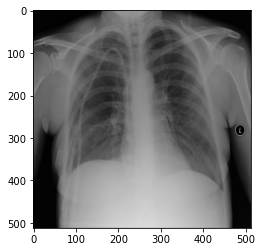

In [13]:
plt.imshow(img)

In [14]:
img.shape

(512, 512, 3)

In [15]:
urls = os.listdir(r'C:\Users\91931\Desktop\Tb analysis\TB_Chest_Radiography_Database\Tuberculosis')

In [16]:
path = r"C:\Users\91931\Desktop\Tb analysis\TB_Chest_Radiography_Database\Tuberculosis" + urls[0]

In [17]:
path

'C:\\Users\\91931\\Desktop\\Tb analysis\\TB_Chest_Radiography_Database\\TuberculosisTuberculosis-1.png'

In [18]:
def loadImages(path, urls, target):

    images = []
    labels = []
    for i in range(len(urls)):
        img_path = path + "/" + urls[i]
        img = cv2.imread(img_path)
        img = img / 255.0
        img = cv2.resize(img, (100, 100))
        images.append(img)
        labels.append(target)
    images = np.asarray(images)
    return images, labels

In [19]:
tb_path = r'C:\Users\91931\Desktop\Tb analysis\TB_Chest_Radiography_Database\Tuberculosis'
tbUrl = os.listdir(tb_path)
tbImages, tbTargets = loadImages(tb_path, tbUrl, 1)

In [20]:
len(tbUrl), len(tbImages)

(700, 700)

In [21]:
normal_path = r'C:\Users\91931\Desktop\Tb analysis\TB_Chest_Radiography_Database\Normal'
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

In [22]:
tbImages.shape

(700, 100, 100, 3)

In [23]:
normalImages.shape

(3500, 100, 100, 3)

In [24]:
data = np.r_[tbImages, normalImages]

In [25]:
data.shape

(4200, 100, 100, 3)

In [26]:
targets = np.r_[tbTargets, normalTargets]
targets.shape

(4200,)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

In [28]:
import tensorflow as tf

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [30]:
model = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 16)       0

In [32]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])


In [33]:
model.fit(x_train, y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
99/99 [==============================] - 21s 200ms/step - loss: 0.2514 - accuracy: 0.9019 - val_loss: 0.2365 - val_accuracy: 0.9029
Epoch 2/5
99/99 [==============================] - 19s 192ms/step - loss: 0.1550 - accuracy: 0.9381 - val_loss: 0.1289 - val_accuracy: 0.9533
Epoch 3/5
99/99 [==============================] - 19s 193ms/step - loss: 0.1216 - accuracy: 0.9549 - val_loss: 0.1246 - val_accuracy: 0.9619
Epoch 4/5
99/99 [==============================] - 19s 194ms/step - loss: 0.1039 - accuracy: 0.9625 - val_loss: 0.1165 - val_accuracy: 0.9486
Epoch 5/5
99/99 [==============================] - 19s 197ms/step - loss: 0.0816 - accuracy: 0.9727 - val_loss: 0.1110 - val_accuracy: 0.9562


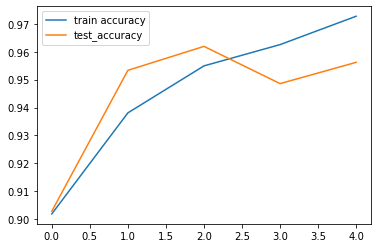

In [34]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

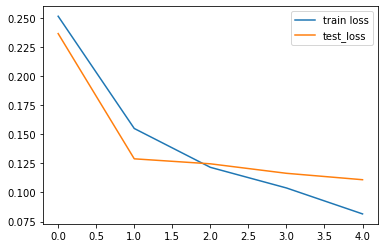

In [35]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

In [36]:
model.predict(x_test)

33/33 [==============================] - 2s 41ms/step


array([[0.00934182],
       [0.00247309],
       [0.00081006],
       ...,
       [0.01724986],
       [0.0137278 ],
       [0.00057202]], dtype=float32)

In [49]:
y_preds = model.predict(x_test)
threshold = 0.5
result = str(example).startswith('12')
for numbers in y_preds:
    if(y_preds.any()>=0.5):
        y_preds=1
    else:
        y_preds=0
y_preds

33/33 [==============================] - 1s 42ms/step


AttributeError: 'int' object has no attribute 'any'

In [39]:
from sklearn.metrics import precision_score, recall_score

In [41]:
precision_score()

TypeError: precision_score() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [77]:
data.shape

(4200, 100, 100, 3)

In [78]:
targets.shape

(4200,)

In [86]:
y_preds = model.prediction(y_test)

AttributeError: 'Sequential' object has no attribute 'prediction'

In [92]:
predict_x=model.predict(x_test) 
threshold =0.5
binary_preds = np.where(predict_x >= threshold, 1,0)

33/33 [==============================] - 1s 39ms/step


In [93]:
binary_preds

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [96]:
precision = precision_score(y_pred,binary_preds)

ValueError: Found input variables with inconsistent numbers of samples: [10100, 1050]